In [2]:
import pickle
import numpy as np
from config import *

pickle_file = 'observations_0.pkl'

with open(pickle_file, 'rb') as file:
    data = pickle.load(file)
for row in data[1:100]:
    print(row)

[21, 22, 20, 12, 11]
Succeeded to open the port
Succeeded to change the baudrate
Dynamixel 21 has been successfully connected
Dynamixel 21 DRIVE SET
Dynamixel 21 TIME PROFILE SET
Dynamixel 22 has been successfully connected
Dynamixel 22 DRIVE SET
Dynamixel 22 TIME PROFILE SET
Dynamixel 20 has been successfully connected
Dynamixel 20 DRIVE SET
Dynamixel 20 TIME PROFILE SET
Dynamixel 12 has been successfully connected
Dynamixel 12 DRIVE SET
Dynamixel 12 TIME PROFILE SET
Dynamixel 11 has been successfully connected
Dynamixel 11 DRIVE SET
Dynamixel 11 TIME PROFILE SET
Dynamixel 21 has been successfully connected
Dynamixel 21 has been successfully set to initial position
Dynamixel 22 has been successfully connected
Dynamixel 22 has been successfully set to initial position
Dynamixel 20 has been successfully connected
Dynamixel 20 has been successfully set to initial position
Dynamixel 12 has been successfully connected
Dynamixel 12 has been successfully set to initial position
Dynamixel 11 

In [3]:
with open('observations_0.pkl', 'rb') as f:
    joint_readings = pickle.load(f)[1:]

In [4]:
def convert_to_dxl_position(joint_angles):
    """
    Convert joint angles to Dynamixel positions.
    Assuming joint_angles are in radians and need to be mapped to Dynamixel positions.
    """
    dxl_positions = []
    for angle in joint_angles:
        position = int((angle + np.pi) / (2 * np.pi) * 4095)
        position = np.clip(position, 0, 4095)
        dxl_positions.append(position)
    return dxl_positions

In [5]:
for joint_angles in joint_readings:
    joint_positions = convert_to_dxl_position(joint_angles)

In [6]:
joint_positions

[2635, 2366, 2037, 1425, 1363]

In [7]:
joint_angles

array([ 0.90252891,  0.49000886, -0.0159563 , -0.95506572, -1.05011697])

In [8]:
# dxl_positions for all values of joint_angles
dxl_positions = []
for joint_angles in joint_readings:
    dxl_positions.append(convert_to_dxl_position(joint_angles))

dxl_positions

[[2103, 2303, 1838, 1799, 1794],
 [2213, 2266, 1771, 1678, 1668],
 [2333, 2139, 1894, 1555, 1548],
 [2442, 2126, 2020, 1429, 1601],
 [2565, 2256, 2131, 1299, 1633],
 [2696, 2178, 2230, 1176, 1519],
 [2654, 2302, 2341, 1058, 1420],
 [2768, 2431, 2220, 1179, 1307],
 [2677, 2554, 2099, 1299, 1230],
 [2769, 2677, 1996, 1423, 1359],
 [2866, 2563, 2130, 1307, 1486],
 [2734, 2442, 2246, 1210, 1613],
 [2802, 2308, 2338, 1336, 1488],
 [2676, 2180, 2410, 1470, 1606],
 [2609, 2306, 2502, 1359, 1487],
 [2691, 2432, 2369, 1240, 1374],
 [2762, 2307, 2243, 1359, 1264],
 [2734, 2403, 2124, 1484, 1176],
 [2622, 2267, 2028, 1606, 1166],
 [2735, 2372, 1936, 1717, 1310],
 [2853, 2508, 2068, 1597, 1435],
 [2822, 2396, 2188, 1474, 1563],
 [2825, 2266, 2292, 1345, 1440],
 [2708, 2140, 2401, 1233, 1331],
 [2650, 2262, 2279, 1362, 1229],
 [2777, 2392, 2148, 1488, 1195],
 [2674, 2509, 2037, 1606, 1311],
 [2790, 2630, 1930, 1728, 1449],
 [2670, 2516, 2054, 1613, 1581],
 [2792, 2385, 2169, 1480, 1483],
 [2790, 22

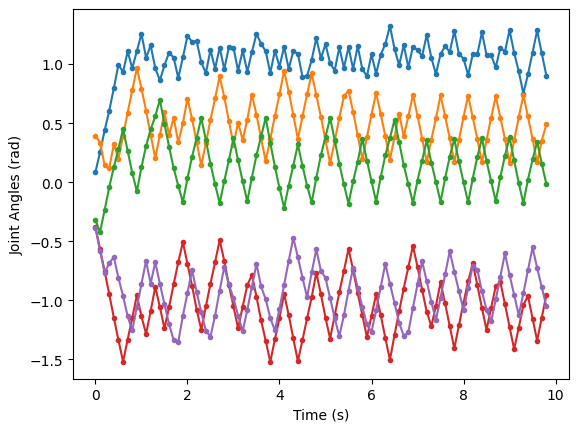

In [10]:
import matplotlib.pyplot as plt
# plot the joint angles against time which is index of list divided by 10
plt.plot([i/10 for i in range(len(joint_readings))], joint_readings, '.-')
plt.xlabel('Time (s)')
plt.ylabel('Joint Angles (rad)')
plt.show()